In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")
from utils import *
import re, gc

In [3]:
train_trans = pd.read_csv('../input/train_transaction.csv')
test_trans = pd.read_csv('../input/test_transaction.csv')
df = pd.concat([train_trans, test_trans], sort=False)

In [11]:
del train_trans, test_trans
gc.collect()

48

In [4]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0.0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0.0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0.0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0.0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Vcols = ['V%i'%i for i in range(1, 340)]
cnt_num = df[Vcols].count()
cnt_num = cnt_num.to_frame('cnt')
Vgroup = {}
for k,v in cnt_num.groupby('cnt'):
    Vgroup[k] = list(v.index)
Vgroup = {v[0]: v for k,v in Vgroup.items()}

In [10]:
# standard 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df[Vcols] = std.fit_transform(df[Vcols])

In [13]:
svd_dict = {}
for k,v in Vgroup.items():
    svd_dict[k] = np.linalg.svd(df.loc[df[k].notnull(), v].values, full_matrices=0)
gc.collect()

0

In [14]:
tol = 0.9
for k, (U, s, VT) in svd_dict.items():
    select = np.where(np.cumsum(s)/np.sum(s) > tol)[0][0]+1
    print('group: %s to %s, principal components num %i/%i'%(k, Vgroup[k][-1], select, len(Vgroup[k])))
    new_cols = ['%s_pca_%i'%(k, i) for i in range(select)]
    for col in new_cols:
        df[col] = np.nan
    df.loc[df[k].notnull() ,new_cols] = np.dot(np.dot(U[:, :select], np.diag(s[:select])), VT[:select, :select])

group: V138 to V163, principal components num 11/18
group: V143 to V166, principal components num 7/11
group: V322 to V339, principal components num 10/18
group: V217 to V278, principal components num 21/46
group: V169 to V210, principal components num 12/19
group: V167 to V216, principal components num 15/31
group: V220 to V272, principal components num 10/16
group: V1 to V11, principal components num 8/11
group: V35 to V52, principal components num 12/18
group: V75 to V94, principal components num 13/20
group: V53 to V74, principal components num 14/22
group: V12 to V34, principal components num 14/23
group: V281 to V315, principal components num 8/11
group: V95 to V137, principal components num 25/43
group: V279 to V321, principal components num 17/32


In [19]:
df.drop(Vcols, axis=1, inplace=True)

In [21]:
df[df['isFraud'].notnull()].to_csv('../input/train_transaction_pca.csv',index=False)
df[df['isFraud'].isnull()].to_csv('../input/test_transaction_pca.csv',index=False)

In [30]:
df_train = df[df['isFraud'].notnull()].copy().sort_values('TransactionDT')

197
Fold 1 started at Wed Aug 28 23:14:37 2019
Training until validation scores don't improve for 200 rounds.
[100]	training's binary_logloss: 0.0962132	training's auc: 0.850723	valid_1's binary_logloss: 0.121507	valid_1's auc: 0.817116
[200]	training's binary_logloss: 0.088261	training's auc: 0.862873	valid_1's binary_logloss: 0.114262	valid_1's auc: 0.82437
[300]	training's binary_logloss: 0.0837178	training's auc: 0.870776	valid_1's binary_logloss: 0.111111	valid_1's auc: 0.827368
[400]	training's binary_logloss: 0.0805162	training's auc: 0.877464	valid_1's binary_logloss: 0.109255	valid_1's auc: 0.829191
[500]	training's binary_logloss: 0.0780082	training's auc: 0.882895	valid_1's binary_logloss: 0.108027	valid_1's auc: 0.830567
[600]	training's binary_logloss: 0.0759032	training's auc: 0.888416	valid_1's binary_logloss: 0.107104	valid_1's auc: 0.831917
[700]	training's binary_logloss: 0.0741053	training's auc: 0.893318	valid_1's binary_logloss: 0.106508	valid_1's auc: 0.832614
[80

[400]	training's binary_logloss: 0.0996875	training's auc: 0.873581	valid_1's binary_logloss: 0.105988	valid_1's auc: 0.853652
[500]	training's binary_logloss: 0.0980767	training's auc: 0.876541	valid_1's binary_logloss: 0.105265	valid_1's auc: 0.855477
[600]	training's binary_logloss: 0.0967451	training's auc: 0.879061	valid_1's binary_logloss: 0.104693	valid_1's auc: 0.857006
[700]	training's binary_logloss: 0.095569	training's auc: 0.88119	valid_1's binary_logloss: 0.104268	valid_1's auc: 0.858602
[800]	training's binary_logloss: 0.094561	training's auc: 0.883488	valid_1's binary_logloss: 0.103929	valid_1's auc: 0.859478
[900]	training's binary_logloss: 0.0935487	training's auc: 0.885393	valid_1's binary_logloss: 0.103608	valid_1's auc: 0.860422
[1000]	training's binary_logloss: 0.0926842	training's auc: 0.887021	valid_1's binary_logloss: 0.103347	valid_1's auc: 0.860995
[1100]	training's binary_logloss: 0.0918244	training's auc: 0.889034	valid_1's binary_logloss: 0.103087	valid_1's

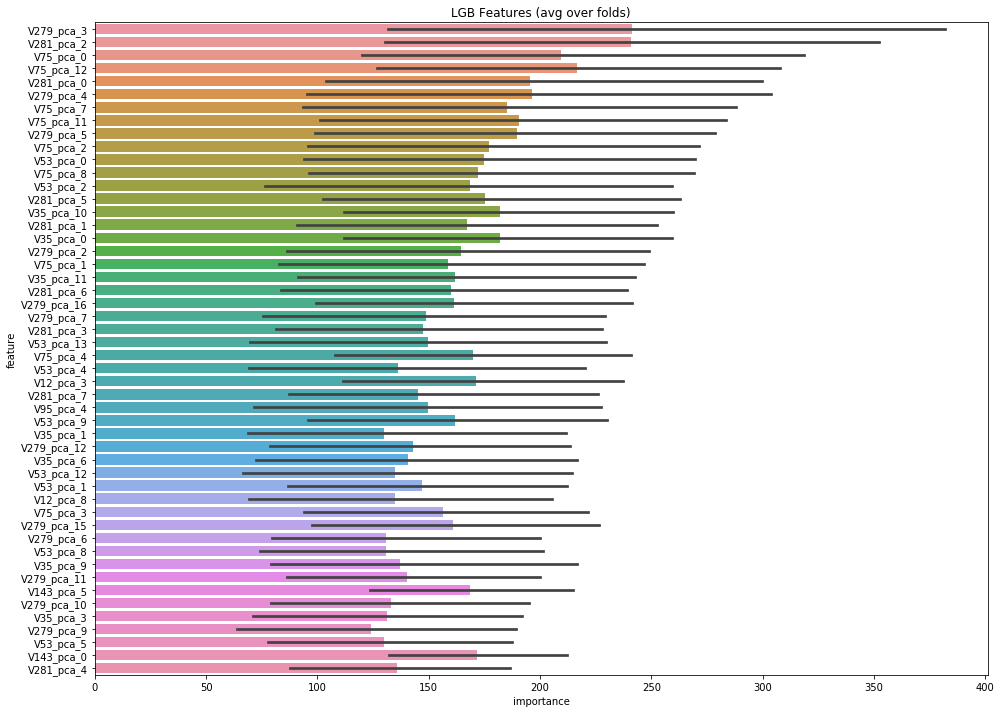

In [33]:
from sklearn.model_selection import KFold, TimeSeriesSplit
features = [x for x in df.columns if 'pca' in x]
print(len(features))
params = {'num_leaves': 400,
          'min_child_samples': 1000,
          'objective': 'binary',
          'max_depth': 12,
          'learning_rate': 0.01,
          "boosting_type": "gbdt",
          "subsample_freq": 1,
          "subsample": 0.5,
          'sub_feature': 0.8,
          #"bagging_seed": 11,
          # "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.1,
          'reg_lambda': 1.0,
          #'device_type': 'gpu'
         }
folds = TimeSeriesSplit(5)
lgb_res = train_model_classification(df_train, df_train.head(), df_train['isFraud'], params, folds, model_type='lgb', eval_metric='auc', 
                           columns=features, plot_feature_importance=True,
                           model=None, verbose=100, early_stopping_rounds=200, n_estimators=50000, 
                           splits=folds, averaging='usual', n_jobs=4)